Load the data and perform EDA.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

1. Evaluate missing values
2. Assess target class distribution
3. Assess information value of individual features (correlation analysis and pairlot).

5 pts.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
employAtt = pd.read_csv('Employee-Attrition.csv')

In [ ]:
employAtt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
employAtt.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
employAtt['Gender'] = employAtt['Gender'].astype('category')
employAtt['Education'] = employAtt['Education'].astype('category')
employAtt['MaritalStatus'] = employAtt['MaritalStatus'].astype('category')
employAtt['JobRole'] = employAtt['JobRole'].astype('category')
employAtt['OverTime'] = employAtt['OverTime'].astype('category')
employAtt['Attrition'] = employAtt['Attrition'].astype('category')
employAtt['EducationField'] = employAtt['EducationField'].astype('category')
employAtt['BusinessTravel'] = employAtt['BusinessTravel'].astype('category')
employAtt['DistanceFromHome'] = employAtt['DistanceFromHome'].astype('category')
employAtt['Department'] = employAtt['Department'].astype('category')

In [ ]:
employAtt.drop(['EmployeeCount'], axis=1, inplace= True)
employAtt.drop(['Over18'], axis=1, inplace= True)
employAtt.drop(['StandardHours'], axis=1, inplace= True)

In [ ]:
rework = {"BusinessTravel": {"Non-Travel": 0, "Travel_frequently": 1, "Travel_Rarely": 2},
          "Department": {"Human Resources": 0, "Research & Development": 1, "Sales": 2}, 
          "Attrition": {"No": 0, "Yes:": 1}, 
          "MaritalStatus": {"Single": 0, "Married:": 1, "Divorced": 2}, 
          "Gender": {"Female": 0, "Male": 1}, 
          "EducationField": {"Human Resources": 0, "Marketing": 1, "Medical": 2, "Other": 3, "Technical Degree": 4, "Life Sciences": 5}, 
          "JobRole": {"Human Resources": 0, "Healthcare Representative": 1, "Laboratory Technician": 2, "Manager": 3, "Manufacturing Director": 4}}


In [ ]:
employAtt.replace(rework, inplace= True)

In [ ]:
employAtt['Attrition'] = employAtt['Attrition'].apply(lambda x :1 if x== 'Yes' else 0)

In [ ]:
employAtt = pd.get_dummies(employAtt, drop_first= True)

In [ ]:
employAtt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age                               1470 non-null   int64
 1   Attrition                         1470 non-null   int64
 2   DailyRate                         1470 non-null   int64
 3   Department                        1470 non-null   int64
 4   EducationField                    1470 non-null   int64
 5   EmployeeNumber                    1470 non-null   int64
 6   EnvironmentSatisfaction           1470 non-null   int64
 7   Gender                            1470 non-null   int64
 8   HourlyRate                        1470 non-null   int64
 9   JobInvolvement                    1470 non-null   int64
 10  JobLevel                          1470 non-null   int64
 11  JobSatisfaction                   1470 non-null   int64
 12  MonthlyIncome                     

In [ ]:
print('probability of employee attrition: ', employAtt.Attrition.mean())

probability of employee attrition:  0.16122448979591836


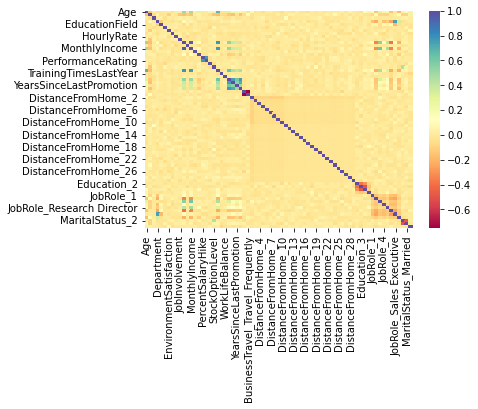

In [ ]:
sns.heatmap(employAtt.corr(), cmap="Spectral")

In [ ]:
employAtt.corr()['Attrition'].sort_values(ascending=False)

Attrition                           1.000000
OverTime_Yes                        0.246118
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
DistanceFromHome_24                 0.101306
                                      ...   
Age                                -0.159205
MonthlyIncome                      -0.159840
YearsInCurrentRole                 -0.160545
JobLevel                           -0.169105
TotalWorkingYears                  -0.171063
Name: Attrition, Length: 71, dtype: float64

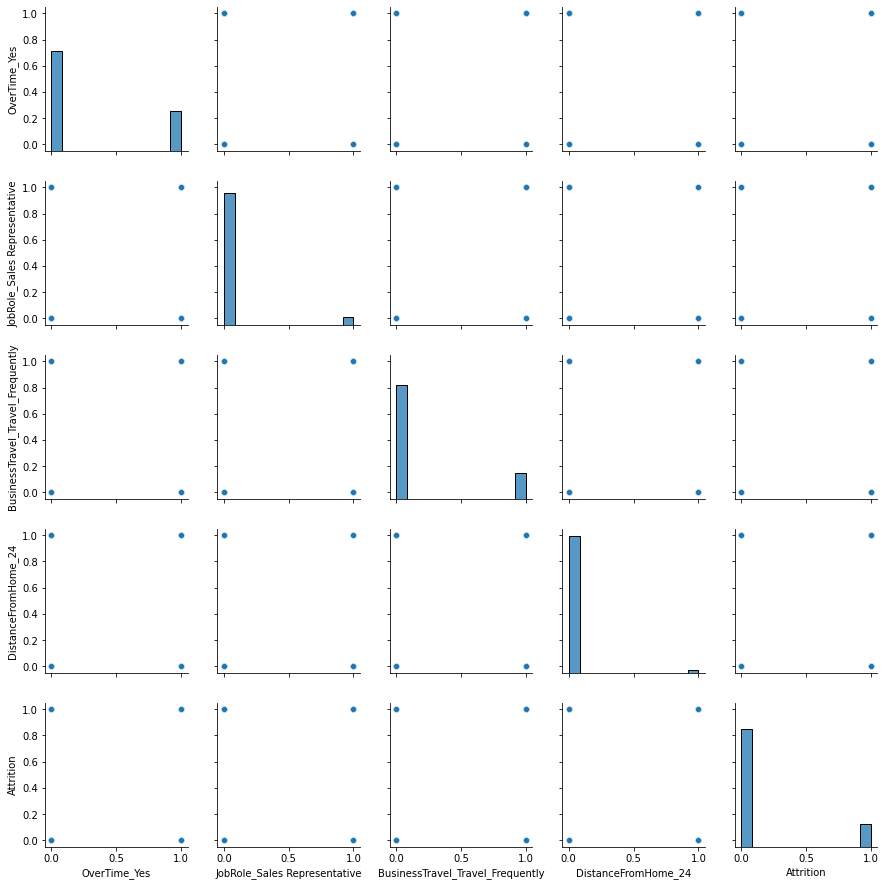

In [ ]:
sns.pairplot(employAtt[['OverTime_Yes','JobRole_Sales Representative','BusinessTravel_Travel_Frequently','DistanceFromHome_24', 'Attrition']],)

4. Pre-process the dataset
5. Split the data into training/test datasets (70/30)

4 pts.

In [ ]:
from sklearn.model_selection import train_test_split

X = employAtt.drop('Attrition',axis=1).values
y = employAtt['Attrition'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

6. Build a sequential neural network with the following parameters: 3 hidden dense layers - 100, 50, 25 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer).
7. Use early stopping callback to prevent overfitting.

7 pts.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=128,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
9/9 [==============================] - 1s 30ms/step - loss: 2.2537 - val_loss: 2.6140
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 1.9492 - val_loss: 2.6371
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 2.0231 - val_loss: 2.6374
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 1.9499 - val_loss: 2.6094
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 1.6687 - val_loss: 2.5337
Epoch 6/200
9/9 [==============================] - 0s 10ms/step - loss: 1.7594 - val_loss: 2.4091
Epoch 7/200
9/9 [==============================] - 0s 11ms/step - loss: 1.8716 - val_loss: 2.3352
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - loss: 1.8987 - val_loss: 2.3458
Epoch 9/200
9/9 [==============================] - 0s 10ms/step - loss: 1.7248 - val_loss: 2.3493
Epoch 10/200
9/9 [==============================] - 0s 9ms/step - loss: 1.8029 - val_loss: 2.2684
Epoch 11/200
9/9 [======

8. Plot training and validation losses versus epochs.
9. Print out model confusion matrix.
10. Print out model classification report.
11. Print out model ROC AUC.

4 pts.

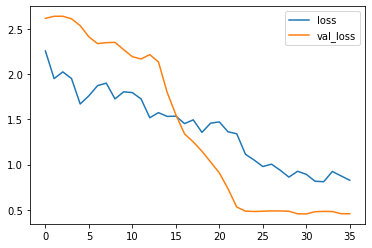

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred >=.5)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

[[364   0]
 [ 77   0]]
ROC AUC:  0.5


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       364
           1       0.00      0.00      0.00        77

    accuracy                           0.83       441
   macro avg       0.41      0.50      0.45       441
weighted avg       0.68      0.83      0.75       441



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
